In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1. Download data files (if not present)
datasets = {
    'speeddata_Aug.csv': 'https://raw.githubusercontent.com/sysuits/urban-traffic-speed-dataset-Guangzhou/master/speeddata_Aug.csv',
    'speeddata_Sep.csv': 'https://raw.githubusercontent.com/sysuits/urban-traffic-speed-dataset-Guangzhou/master/speeddata_Sep.csv',
}
for fname, url in datasets.items():
    if not os.path.exists(fname):
        print(f"Downloading {fname}...")
        pd.read_csv(url).to_csv(fname, index=False)  # quick download via pandas

In [3]:
# 2. Load data with pandas
df_aug = pd.read_csv('speeddata_Aug.csv')
df_sep = pd.read_csv('speeddata_Sep.csv')
df = pd.concat([df_aug, df_sep], ignore_index=True)

In [4]:
# 3. Prepare the 3D NumPy array
roads = df['road_id'].astype(int).values - 1
days = df['day_id'].astype(int).values - 1
times = df['time_id'].astype(int).values - 1
speeds = df['speed'].values

n_roads = df['road_id'].max()
n_days = df['day_id'].max()
n_times = df['time_id'].max()

speeds_3d = np.full((n_roads, n_days, n_times), np.nan, dtype=float)
speeds_3d[roads, days, times] = speeds
print("Reshaped array shape:", speeds_3d.shape)

Reshaped array shape: (214, 61, 144)


In [7]:
# 4. Daily mean speed per road and overall average per day
daily_mean = np.nanmean(speeds_3d, axis=2)  # shape (214, 61)
day_avg_overall = daily_mean.mean(axis=0)  # shape (61,)
print("Overall daily average speeds (first 5 days):", day_avg_overall[:5])

Overall daily average speeds (first 5 days): [nan nan nan nan nan]


/tmp/ipykernel_3529389/2567631769.py:2: RuntimeWarning: Mean of empty slice
  daily_mean = np.nanmean(speeds_3d, axis=2)  # shape (214, 61)


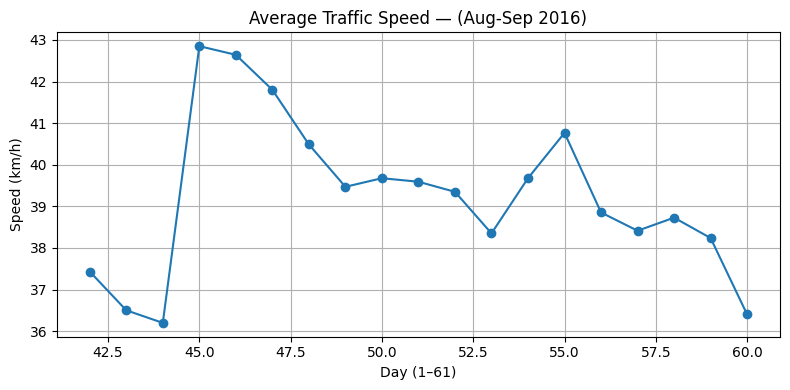

In [9]:
# 5. Plot overall daily average
plt.figure(figsize=(8,4))
plt.plot(day_avg_overall, marker='o')
plt.title("Average Traffic Speed — (Aug‑Sep 2016)")
plt.xlabel("Day (1–61)")
plt.ylabel("Speed (km/h)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# 6. Save a CSV of daily average speeds
output_csv = 'daily_avg_speed.csv'
pd.DataFrame({
    'day': np.arange(1, n_days + 1),
    'avg_speed_kmh': day_avg_overall
}).to_csv(output_csv, index=False)
print(f"✅ Saved daily averages to '{output_csv}'")

✅ Saved daily averages to 'daily_avg_speed.csv'
